In [1]:
%matplotlib inline
import pandas as pd
import json
import requests
from sklearn.preprocessing import MultiLabelBinarizer
from pandas.io.json import json_normalize
from bs4 import BeautifulSoup
pd.options.display.max_rows = 10

In [133]:
oscar_movies = pd.read_csv("oscar_movies.csv")
oscar_movies.head()

,Title,producers,winner,year,Actors,Awards,Country,Director,Genre,Language,...,Rated,Ratings,Released,Response,Runtime,Writer,Year,imdbID,imdbRating,imdbVotes
0,Wings,['Paramount Famous Lasky'],True,1927,"Clara Bow, Charles 'Buddy' Rogers, Richard Arl...",Won 2 Oscars. Another 3 wins & 1 nomination.,USA,"William A. Wellman, Harry d'Abbadie d'Arrast","Drama, Romance, War, Action",English,...,PG-13,"[{'Source': 'Internet Movie Database', 'Value'...",05 Jan 1929,True,144 min,"John Monk Saunders (story), Hope Loring (scree...",1927,tt0018578,7.7,"9,884"
1,The Racket,['The Caddo Company'],False,1927,"Robert Mitchum, Lizabeth Scott, Robert Ryan, W...",NaN,USA,"John Cromwell, Mel Ferrer, Tay Garnett, Nichol...","Crime, Drama, Film-Noir",English,...,APPROVED,"[{'Source': 'Internet Movie Database', 'Value'...",NaN,True,88 min,"William Wister Haines (screenplay), W.R. Burne...",1951,tt0043955,6.8,"2,056"
2,7th Heaven,['Fox'],False,1927,"Stephen Collins, Catherine Hicks, Beverley Mit...",Nominated for 1 Primetime Emmy. Another 20 win...,USA,NaN,"Drama, Family, Romance",English,...,TV-PG,"[{'Source': 'Internet Movie Database', 'Value'...",26 Aug 1996,True,60 min,Brenda Hampton,1996–2007,tt0115083,5.2,"22,707"
3,The Broadway Melody,['Metro-Goldwyn-Mayer'],True,1928,"Charles King, Anita Page, Bessie Love",Won 1 Oscar. Another 2 nominations.,USA,Harry Beaumont,"Drama, Musical, Romance",English,...,Passed,"[{'Source': 'Internet Movie Database', 'Value'...",06 Jun 1929,True,100 min,"Edmund Goulding (story), Sarah Y. Mason (conti...",1929,tt0019729,6.2,"5,601"
4,Alibi,['Feature Productions'],False,1928,"Achmed Akkabi, Georgina Verbaan, Frederik Brom...",1 win.,Netherlands,Johan Nijenhuis,Comedy,Dutch,...,NaN,"[{'Source': 'Internet Movie Database', 'Value'...",14 Feb 2008,True,86 min,"Don Bohlinger (story), James Dutcher (story), ...",2008,tt0827170,5.7,796


In [134]:
oscar_movies.Genre = oscar_movies.Genre.astype(str)
binarizer = MultiLabelBinarizer()
genres = pd.DataFrame(
    binarizer.fit_transform(oscar_movies["Genre"].str.split(", ")),
    columns=binarizer.classes_
)
genres = genres.drop(["nan"], axis=1)

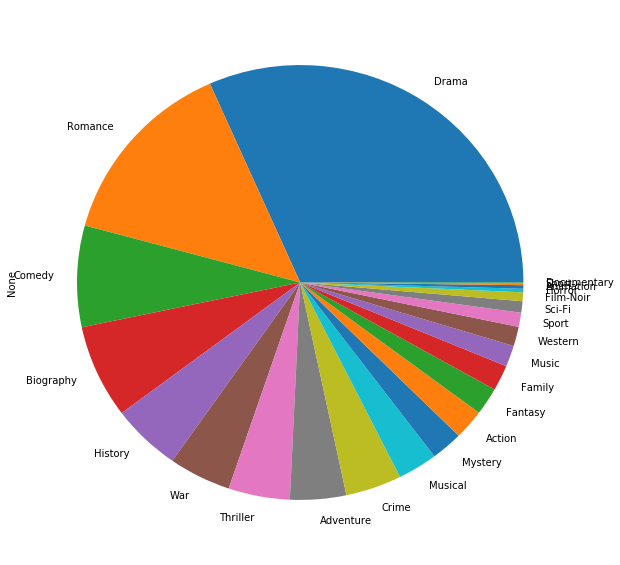

In [135]:
genres.sum().sort_values(ascending=False).plot.pie(figsize=(10,10))

In [136]:
oscar_movies_winner = oscar_movies[oscar_movies["winner"] == True]
oscar_movies_winner.Genre = oscar_movies_winner.Genre.astype(str)
binarizer = MultiLabelBinarizer()
genres_winner = pd.DataFrame(
    binarizer.fit_transform(oscar_movies_winner["Genre"].str.split(", ")),
    columns=binarizer.classes_
)
genres_winner.head()

,Action,Adventure,Biography,Comedy,Crime,Drama,Family,Fantasy,Film-Noir,History,Music,Musical,Mystery,Romance,Sport,Thriller,War,Western
0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0


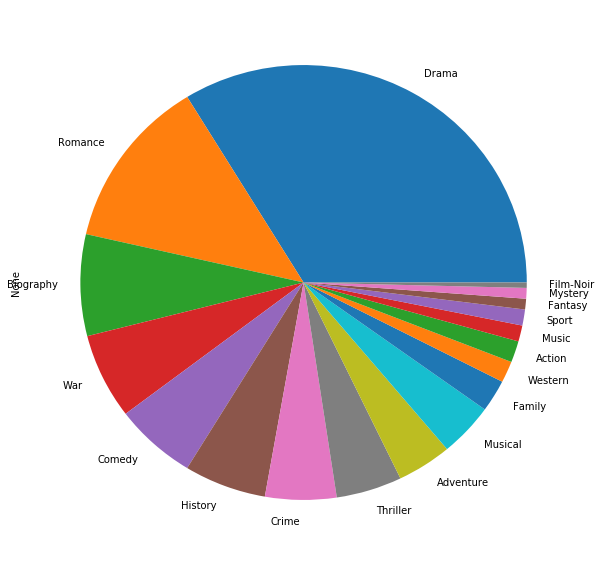

In [137]:
oscar_movies_loser = oscar_movies[oscar_movies["winner"] == False]
oscar_movies_loser.Genre = oscar_movies_winner.Genre.astype(str)
binarizer = MultiLabelBinarizer()
genres_loser = pd.DataFrame(
    binarizer.fit_transform(oscar_movies_winner["Genre"].str.split(", ")),
    columns=binarizer.classes_
)
genres_loser.sum().sort_values(ascending=False).plot.pie(figsize=(10,10))

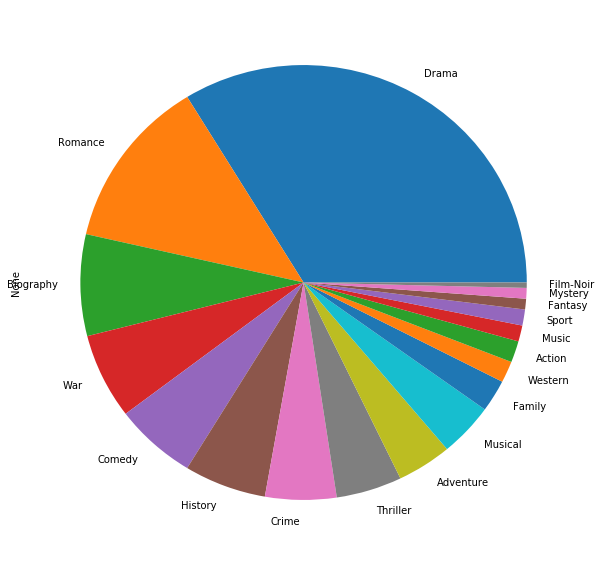

In [138]:
genres_winner.sum().sort_values(ascending=False).plot.pie(figsize=(10,10))

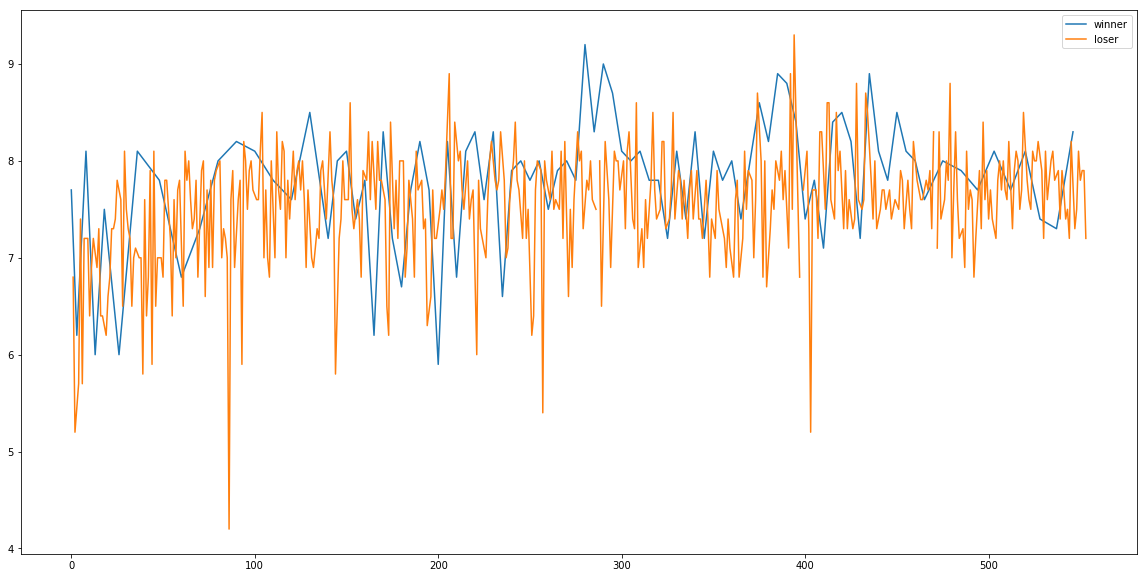

In [139]:
winner_movies = oscar_movies[oscar_movies["winner"]]
loser_movies = oscar_movies[~oscar_movies["winner"]]
winner_movies.imdbRating.plot(figsize=(20,10), legend=True, label="winner")
loser_movies.imdbRating.plot(figsize=(20,10), legend=True, label="loser")

In [140]:
bins = [4, 4.6, 5.1, 5.6, 6.1, 6.6, 7.1, 7.6, 8.1, 8.6, 9.1, 9.6]
names = ["4 to 4.5", "4.6 to 5", "5.1 to 5.5", "5.6 to 6.0", "6.1 to 6.5", 
             "6.6 to 7.0", "7.1 to 7.5", "7.6 to 8.0", "8.1 to 8.5", "8.6 to 9.0", "9.1 to 9.5"]
oscar_movies['Rating_Cohort'] = pd.cut(oscar_movies['imdbRating'], bins, labels=names)

#(dds[dds.Ethnicity == "Hispanic"]["Age Cohort"].
#    value_counts().reindex(new_index).plot.bar())

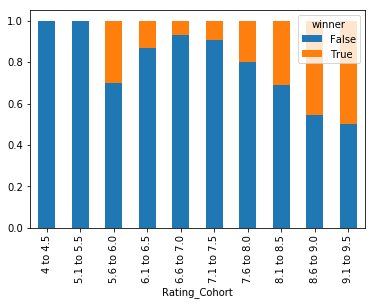

In [141]:
counts = pd.crosstab(oscar_movies.Rating_Cohort, oscar_movies.winner)
winner_given_rating = counts.divide(counts.sum(axis=1), axis=0)
winner_given_rating.plot.bar(stacked=True)

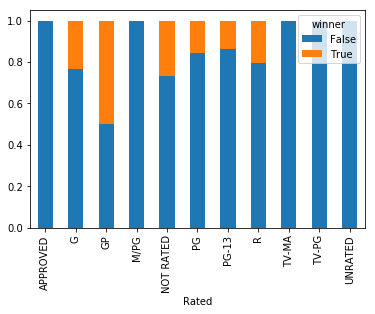

In [142]:
oscar_movies.Rated = oscar_movies[oscar_movies["year"] >= 1960].Rated.str.upper()
counts = pd.crosstab(oscar_movies.Rated, oscar_movies.winner)
winner_given_rating = counts.divide(counts.sum(axis=1), axis=0)
winner_given_rating.plot.bar(stacked=True)

IDEA: split up to see what are the most common ratings for movies in certain years

In [143]:
genre_lists = winner_movies.Genre.str.lower().str.split(", ")

arr = []

for list in genre_lists:
    for genre in list:
        arr.append(genre)
pd.Series(arr).value_counts()

drama        85
romance      32
biography    19
war          16
comedy       15
             ..
sport         3
music         3
fantasy       2
mystery       2
film-noir     1
Length: 18, dtype: int64

In [144]:
genre_lists = loser_movies.Genre.str.lower().str.split(", ")

arr = []

for list in genre_lists:
    for genre in list:
        arr.append(genre)
pd.Series(arr).value_counts()

drama          398
romance        184
comedy         100
biography       87
history         62
              ... 
horror           4
animation        4
nan              3
short            2
documentary      1
Length: 24, dtype: int64

In [145]:
oscar_movies.Runtime = oscar_movies.Runtime.str.split(" ").str[0].fillna(0).astype(int)

In [146]:
bins = [80, 110, 130, 140 ]
names = ["80", "110", 
             "130"]
oscar_movies['Runtime_Cohort'] = pd.cut(oscar_movies['Runtime'], bins, labels=names)

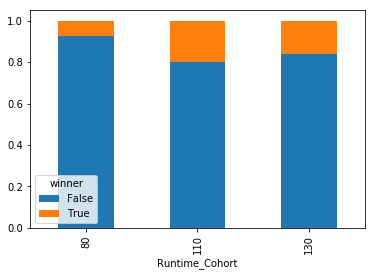

In [147]:
counts = pd.crosstab(oscar_movies.Runtime_Cohort, oscar_movies.winner)
winner_given_rating = counts.divide(counts.sum(axis=1), axis=0)
winner_given_rating.plot.bar(stacked=True)

In [148]:
oscar_movies.columns


Index(['Title', 'producers', 'winner', 'year', 'Actors', 'Awards', 'Country',
       'Director', 'Genre', 'Language', 'Metascore', 'Plot', 'Production',
       'Rated', 'Ratings', 'Released', 'Response', 'Runtime', 'Writer', 'Year',
       'imdbID', 'imdbRating', 'imdbVotes', 'Rating_Cohort', 'Runtime_Cohort'],
      dtype='object')